In [42]:
#Importing pandas and nltk
import re
import pandas as pd
!pip install nltk
import nltk
nltk.download('punkt')
from nltk import(word_tokenize,sent_tokenize)
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Define stopwords 
STOPWORDS = stopwords.words('english')
STOPWORDS + ['said']

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Text cleaning function 
def clean_text(text):
    '''
        Function which returns a clean text 
    '''    
    # Lower case 
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d', '', text)
    
    # Replace \n and \t functions 
    text = re.sub(r'\n', ' ', text)
    text = text.strip()
    
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove Stopwords and Lemmatise the data
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS]
    text = ' '.join(text)
    
    return text


In [43]:
#Reading the data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
# Create a word cloud function 
def create_wordcloud(text, image_path = None):
    '''
    Pass a string to the function and output a word cloud
    
    ARGS 
    text: The text for wordcloud
    image_path (optional): The image mask with a white background (default None)
    
    '''
    
    #text = clean_text(text)
    
    if image_path == None:
        
        # Generate the word cloud
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(text) 
    
    else:
        mask = np.array(Image.open(image_path))
        wordcloud = WordCloud(width = 200, height = 200, 
                    background_color ='white', 
                    stopwords = STOPWORDS,
                    mask=mask,
                    min_font_size = 5).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation = 'nearest') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()  

In [54]:
# Function to plot the ngrams based on n and top k value
def plot_ngrams(text, n=2, topk=15):
    '''
    Function to plot the most commonly occuring n-grams in bar plots 
    
    ARGS
    	text: data to be enterred
    	n: n-gram parameters
    	topk: the top k phrases to be displayed
    '''

    text = clean_text(text)
    tokens = text.split()
    
    # get the ngrams 
    ngram_phrases = ngrams(tokens, n)
    
    # Get the most common ones 
    most_common = Counter(ngram_phrases).most_common(topk)
    
    # Make word and count lists 
    words, counts = [], []
    for phrase, count in most_common:
        word = ' '.join(phrase)
        words.append(word)
        counts.append(count)
    
    # Plot the barplot 
    plt.figure(figsize=(10, 6))
    title = "Most Common " + str(n) + "-grams in the text"
    plt.title(title)
    ax = plt.bar(words, counts)
    plt.xlabel("n-grams found in lyrics from 2020")
    plt.ylabel("Ngram frequencies")
    plt.xticks(rotation=90)
    plt.show()

In [63]:
with open('../data/lyrics/lyrics_from_1960.txt') as f:
    text = f.read()
text

"Yours is my dream\nAbb is a color\nWherever you take\nWe are strong\nI am my dream of yours.\nAbb is a color\nWherever you take\nWe are strong\n\nMy heart is fixed.\nOne day it was to mix.\nLike when you come out\nThe flower blooms are fixed.\nMy heart is fixed.\nOne day it was to mix.\nLike when you come out\nThe flower blooms are fixed.\no my life partner\nYours is my dream\nAbb is a color\nWherever you take\nWe are strong\n\nYour sorrows are my ab\nMy happiness abb yours\nThese two children of yours\nThe moon and the sun are mine.\nYour sorrows are my ab\nMy happiness abb yours\nThese two children of yours\nThe moon and the sun are mine.\no my life partner\nYours is my dream\nAbb is a color\nWherever you take\nWe are strong\n\nMillions of The World's To Celebrate\nWith it will not be released\nin my hands.\nThe hand will not leave it.\nMillions of The World's To Celebrate\nWith it will not be released\nin my hands.\nThe hand will not leave it.\no my life partner\nYours is my dream\

In [56]:
# Cleaened the text 
cleaned_data = clean_text(text)

In [57]:
if "mehbooba" in cleaned_data: 
    cleaned_data = cleaned_data.replace("mehbooba", "mehboob")

In [58]:
cleaned_data

'even say nothing listened chose meâ€¦ chosen listened first intoxicationâ€¦first hummer new loveâ€¦new waiting condition karlu heart desperateâ€¦ tell first drunk first hummer soon fly said wind jhul jaavu somewhere subtractionsâ€¦ soon fly said wind jhul jaavu somewhere subtractionsâ€¦ let sky earth uniteâ€¦ tell guy first intoxicationâ€¦first hummer new loveâ€¦new waiting condition karlu heart desperateâ€¦ tell first drunk first hummer talked dong dream given thousand color talked dong like dream given thousand color like im defeated kiss love first intoxicationâ€¦first hummer new lovenew waiting condition karlu heart desperateâ€¦ tell beautiful valley open sky came said ay sajna spring heart blossomed got got happiness lip beauty light cheek sliver swirl scent hair se mehke chaman marblelike body sweetheart teri chandni tease today koi pyar ki ragini beautiful valley open sky come ay sajna bond love look dont break birth look dont miss shadow thale got destination shade eyelid got 

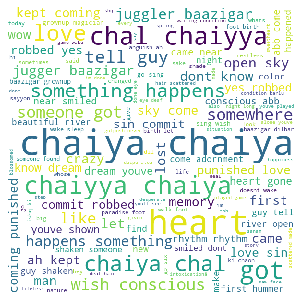

In [59]:
create_wordcloud(cleaned_data)

In [60]:
from collections import Counter

words = cleaned_data.split()
wordCount = dict(Counter(words))

In [61]:
{k: v for k, v in sorted(wordCount.items(), key=lambda item: item[1], reverse=True)}

{'chaiya': 83,
 'heart': 56,
 'got': 35,
 'love': 31,
 'chal': 24,
 'chaiyya': 24,
 'come': 19,
 'tell': 17,
 'someone': 17,
 'dont': 15,
 'something': 15,
 'baazigar': 15,
 'happens': 14,
 'dream': 13,
 'go': 13,
 'came': 12,
 'robbed': 12,
 'rhythm': 12,
 'let': 11,
 'guy': 11,
 'know': 11,
 'somewhere': 10,
 'wish': 10,
 'conscious': 10,
 'like': 9,
 'youve': 9,
 'first': 8,
 'sky': 8,
 'night': 8,
 'yes': 8,
 'foot': 8,
 'juggler': 8,
 'im': 7,
 'beautiful': 7,
 'open': 7,
 'ishq': 7,
 'lost': 7,
 'wake': 7,
 'shaken': 7,
 'near': 7,
 'jugger': 7,
 'ah': 6,
 'kept': 6,
 'coming': 6,
 'punished': 6,
 'sin': 6,
 'commit': 6,
 'memory': 6,
 'wow': 6,
 'crazy': 6,
 'shown': 6,
 'sleep': 6,
 'made': 6,
 'gone': 6,
 'man': 6,
 'smiled': 6,
 'abb': 6,
 'hummer': 5,
 'color': 5,
 'ki': 5,
 'birth': 5,
 'river': 5,
 'adornment': 5,
 'make': 5,
 'find': 5,
 'never': 5,
 'happened': 5,
 'eye': 5,
 'found': 5,
 'walk': 5,
 'grownup': 5,
 'magician': 5,
 'sing': 5,
 'condition': 4,
 'said': 4,


In [ ]:
plot_ngrams(cleaned_data, n=2, topk=15)

In [ ]:
कहीं पे हों रातें
कहीं पे सवेरे
आवारगी ही रही साथ मेरे
ठहर जा, ठहर जा
ये कहती है तेरी नज़र

क्या हाल हो गया है ये मेरा
आँखें मेरी हर जगह
ढूंढ़ें तुझे बेवजह
ये मैं हूँ या कोई और है मेरी तरह

कैसे हुआ, कैसे हुआ
तू इतना ज़रूरी कैसे हुआ
कैसे हुआ, कैसे हुआ
तू इतना ज़रूरी कैसे हुआ
कैसे हुआ, कैसे हुआ
तू इतना ज़रूरी कैसे हुआ